In [6]:
from chess_insight import (
    ChessComApiCommunicator,
    LichessApiCommunicator,
    export_games_to_csv,
)


In [7]:
c1 = LichessApiCommunicator(depth=1)
c2 = ChessComApiCommunicator(depth=1)

In [19]:

games = list(c1.games_generator("pro100wdupe", 250, "blitz"))

export_games_to_csv(games)

Collected 250 games (api_communicator.py:61)
Saved 250 games to games.csv (__init__.py:14)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("games.csv")

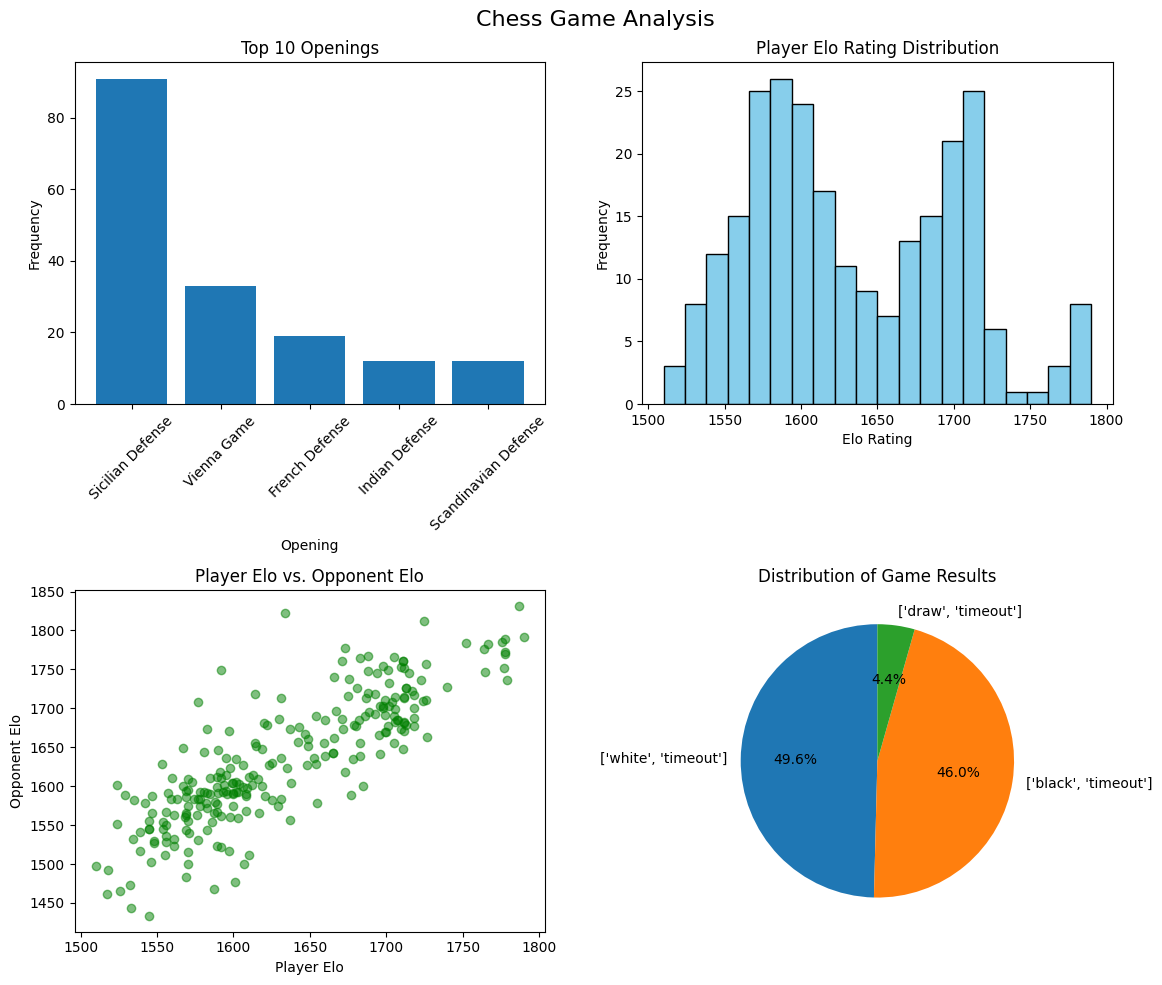

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# set title
fig.suptitle('Chess Game Analysis', fontsize=16)
# Chart 1: Bar chart for the frequency of openings
opening_counts = df['opening_short'].value_counts()
axes[0, 0].bar(opening_counts.index[:5], opening_counts[:5])
axes[0, 0].set_title('Top 10 Openings')
axes[0, 0].set_xlabel('Opening')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].tick_params(axis='x', rotation=45)

# Chart 2: Histogram of player Elo ratings
axes[0, 1].hist(df['player_elo'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Player Elo Rating Distribution')
axes[0, 1].set_xlabel('Elo Rating')
axes[0, 1].set_ylabel('Frequency')

# Chart 3: Scatter plot of player Elo vs. opponent Elo
axes[1, 0].scatter(df['player_elo'], df['opponent_elo'], alpha=0.5, color='green')
axes[1, 0].set_title('Player Elo vs. Opponent Elo')
axes[1, 0].set_xlabel('Player Elo')
axes[1, 0].set_ylabel('Opponent Elo')

# Chart 4: Pie chart for the distribution of game results
result_counts = df['result'].value_counts()
axes[1, 1].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Game Results')

# Adjust layout
plt.tight_layout()
